<a href="https://colab.research.google.com/github/FizaAyub/BEE12D---Facial-Sentiment-Analysis---Fiza-Ayub-/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


# Mount Google Drive
from google.colab import drive
drive.mount('/content/my_drive')

# Set the paths
dataset_root = '/content/my_drive/MyDrive/Our Dataset'

touch_data_dir = f'{dataset_root}/interaction_frames'
not_touch_data_dir = f'{dataset_root}/non_interaction_frames'

# List all image files in the directories
touch_image_files = [os.path.join(touch_data_dir, file) for file in os.listdir(touch_data_dir) if file.endswith(('.jpg', '.png'))]
not_touch_image_files = [os.path.join(not_touch_data_dir, file) for file in os.listdir(not_touch_data_dir) if file.endswith(('.jpg', '.png'))]

# Create a DataFrame with file paths and labels
touch_df = pd.DataFrame({'filepath': touch_image_files, 'label': 1})
not_touch_df = pd.DataFrame({'filepath': not_touch_image_files, 'label': 0})

# Combine the dataframes
combined_df = pd.concat([touch_df, not_touch_df], ignore_index=True)

# Split the dataframe into train and validation sets
train_df, val_df = train_test_split(combined_df, test_size=0.2, random_state=42)


Drive already mounted at /content/my_drive; to attempt to forcibly remount, call drive.mount("/content/my_drive", force_remount=True).


In [26]:

# Convert the 'label' column to string format
train_df['label'] = train_df['label'].astype(str)
val_df['label'] = val_df['label'].astype(str)
# Create ImageDataGenerator without data augmentation
datagen = ImageDataGenerator(rescale=1./255)
img_height, img_width = 224, 224
batch_size=64

# Generate images without augmentation using flow_from_dataframe
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = datagen.flow_from_dataframe(
    val_df,
    x_col='filepath',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)
# Count the occurrences of each class in the training set
train_class_counts = train_df['label'].value_counts()

# Count the occurrences of each class in the validation set
val_class_counts = val_df['label'].value_counts()

print("Training Class Counts:")
print(train_class_counts)

print("\nValidation Class Counts:")
print(val_class_counts)

Found 21597 validated image filenames belonging to 2 classes.
Found 5400 validated image filenames belonging to 2 classes.
Training Class Counts:
1    11278
0    10319
Name: label, dtype: int64

Validation Class Counts:
1    2828
0    2572
Name: label, dtype: int64


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
num_epochs=1
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator,


    verbose=1
)

338/338 [==============================] - 187s 548ms/step - loss: 0.5380 - accuracy: 0.9012 - val_loss: 0.0206 - val_accuracy: 0.9993


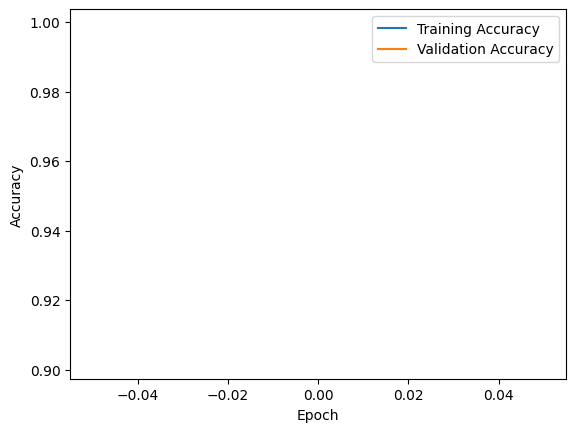

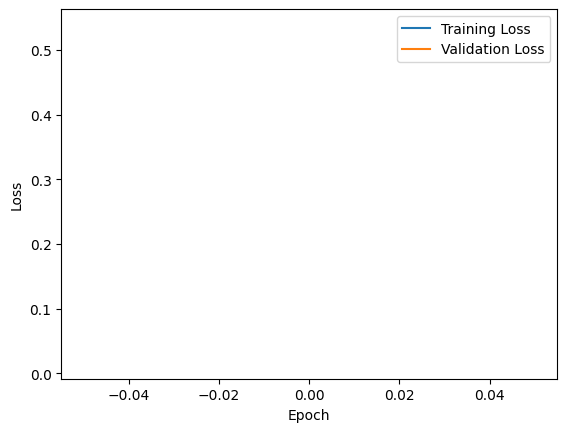

In [25]:


import matplotlib.pyplot as plt

# Plot training/validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training/validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()